# TUG Test using LSTM model
LSTM models is used for time-sequential related. The walking time of patient is measure using the Timed Up and Go Test (TUG).

In [2]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#%pip install tensorflow
import tensorflow as tf

## Sample 1 - Self Collected Dataset

Step 1: Extract .json files into .csv files

In [6]:
# read json file for NP_side_1.mp4
import json

# image_id, category_id, keypoints, score, box, idx
f = open("D:/PD/outputs/Self Collected Dataset/data_keypoints/NP/NP_side_1.mp4/side_1.json")
data = json.load(f)

for i in data:
    print(i)

f.close()

{'image_id': '0.jpg', 'category_id': 1, 'keypoints': [1776.949462890625, 290.3154296875, 0.9367364645004272, 1795.511474609375, 277.9407653808594, 0.9571114778518677, 1770.7620849609375, 284.1280822753906, 0.9374991059303284, 1845.0101318359375, 296.5027770996094, 0.911241888999939, 1764.5748291015625, 302.6900939941406, 0.709499716758728, 1894.5089111328125, 383.12548828125, 0.8558382391929626, 1770.7620849609375, 401.6875, 0.9157924652099609, 1919.2581787109375, 506.8722229003906, 0.8913031816482544, 1752.2000732421875, 506.8722229003906, 0.8644285202026367, 1820.2608642578125, 537.8088989257812, 0.913506805896759, 1715.0760498046875, 550.18359375, 0.7937349677085876, 1882.1341552734375, 574.9329223632812, 0.7638155221939087, 1783.1368408203125, 574.9329223632812, 0.7995191812515259, 1727.4508056640625, 618.2443237304688, 0.8776913285255432, 1647.015380859375, 605.86962890625, 0.9335474371910095, 1733.6380615234375, 810.0517578125, 0.8783201575279236, 1653.2027587890625, 779.11505126

In [7]:
import csv

def extract_all_json_data(base_folder, output_csv):
    all_rows = []
    keypoint_len = 0
    box_len = 0
    for root, dirs, files in os.walk(base_folder):
        for fname in sorted(files):
            if fname.endswith('.json'):
                path = os.path.join(root, fname)
                with open(path) as f:
                    try:
                        frames = json.load(f)
                    except Exception as e:
                        print(f"Error reading {path}: {e}")
                        continue
                    if isinstance(frames, dict):
                        frames = [frames]
                    for frame in frames:
                        row = {
                            'file_id': os.path.splitext(fname)[0],
                            'image_id': frame.get('image_id', ''),
                            'category_id': frame.get('category_id', ''),
                            'score': frame.get('score', '')
                        }
                        # NP/PD label as before if needed
                        if os.sep + "NP" + os.sep in root + os.sep:
                            row['label'] = 0
                        elif os.sep + "PD" + os.sep in root + os.sep:
                            row['label'] = 1
                        # Flatten keypoints and box
                        if 'keypoints' in frame:
                            keypoints = frame['keypoints']
                            keypoint_len = max(keypoint_len, len(keypoints))
                            for i, v in enumerate(keypoints):
                                row[f'keypoint_{i}'] = v
                        if 'box' in frame:
                            box = frame['box']
                            box_len = max(box_len, len(box))
                            for i, v in enumerate(box):
                                row[f'box_{i}'] = v
                        all_rows.append(row)
    # Prepare column headers
    fieldnames = ['file_id', 'image_id', 'category_id', 'score', 'label'] \
                 + [f'keypoint_{i}' for i in range(keypoint_len)] \
                 + [f'box_{i}' for i in range(box_len)]
    # Write to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in all_rows:
            writer.writerow(row)

# Usage:
base_folder = "D:/PD/outputs/Self Collected Dataset/data_keypoints"
output_csv = "D:/PD/outputs/Self Collected Dataset/data_keypoints/processed.csv"
extract_all_json_data(base_folder, output_csv)
print(f"Data extracted to {output_csv}")

Data extracted to D:/PD/outputs/Self Collected Dataset/data_keypoints/processed.csv


Step 2: Import the processed csv file

In [9]:
df = pd.read_csv("D:/PD/outputs/Self Collected Dataset/data_keypoints/processed.csv")
df

,file_id,image_id,category_id,score,label,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,...,keypoint_45,keypoint_46,keypoint_47,keypoint_48,keypoint_49,keypoint_50,box_0,box_1,box_2,box_3
0,side_1,0.jpg,1,3.064861,0,1776.949463,290.315430,0.936736,1795.511475,277.940765,...,1733.638062,810.051758,0.878320,1653.202759,779.115051,0.888933,1584.691895,242.672989,328.829102,633.583176
1,side_1,1.jpg,1,3.044587,0,1772.542236,297.033234,0.933447,1797.218018,278.526428,...,1735.528564,815.224243,0.875662,1655.332397,778.210571,0.898846,1589.356079,243.363480,323.189697,631.699387
2,side_1,2.jpg,1,3.040520,0,1772.882080,297.060272,0.937124,1797.643188,278.489471,...,1735.740479,817.042908,0.873410,1649.076782,779.901306,0.892036,1589.388550,243.204956,323.655273,633.883484
3,side_1,3.jpg,1,3.068251,0,1778.147827,295.277008,0.948588,1796.807983,276.616913,...,1734.607666,811.539734,0.878102,1653.747192,774.219543,0.880930,1583.892090,241.162659,332.531250,636.931519
4,side_1,4.jpg,1,3.068003,0,1776.623413,294.831390,0.949706,1795.289429,282.387421,...,1733.069580,817.478333,0.879155,1652.183716,780.146423,0.873484,1579.648193,240.700073,337.952759,637.131592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16402,PD_side_8,3263.jpg,1,3.037422,1,331.094299,472.632385,0.944869,336.635468,461.550079,...,403.129242,860.512756,0.914392,347.717773,899.300781,0.812445,141.266983,391.177490,363.031265,567.413513
16403,PD_side_8,3264.jpg,1,3.043385,1,331.179413,471.806122,0.942025,336.740112,460.684753,...,403.468414,855.493835,0.922142,347.861481,894.418640,0.815027,141.331039,390.063995,363.014664,569.414764
16404,PD_side_8,3265.jpg,1,3.043093,1,332.211853,471.212189,0.929804,337.780518,460.074829,...,404.604645,855.450867,0.932653,348.917877,900.000305,0.831495,142.784409,389.352600,362.148819,570.232544
16405,PD_side_8,3266.jpg,1,3.046185,1,327.448456,471.133331,0.928768,338.564758,460.017029,...,405.262604,854.645996,0.908813,349.681061,899.111206,0.805914,144.321869,389.428436,360.695007,569.154999


## Data Dictionary
- **file_ID:** Name of the source file (without extension).
- **image_id:** Identifier or filename of the original image.
- **category_id:** Object category ID (1 for person).
- **score:** Confidence score of the detection or prediction, ranges from 0 to 1
- **label:** Class label assigned by folder (0 for NP, 1 for PD).
- **keypoint_N:** Flattened coordinates and confidence for each keypoint. [x-coordinate, y-coordinate, and confidence]
- **box_N:** Flattened bounding box values for the detected object. [x_min, y_min, x_max, y_max]

Step 3: Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_id      16407 non-null  object 
 1   image_id     16407 non-null  object 
 2   category_id  16407 non-null  int64  
 3   score        16407 non-null  float64
 4   label        16407 non-null  int64  
 5   keypoint_0   16407 non-null  float64
 6   keypoint_1   16407 non-null  float64
 7   keypoint_2   16407 non-null  float64
 8   keypoint_3   16407 non-null  float64
 9   keypoint_4   16407 non-null  float64
 10  keypoint_5   16407 non-null  float64
 11  keypoint_6   16407 non-null  float64
 12  keypoint_7   16407 non-null  float64
 13  keypoint_8   16407 non-null  float64
 14  keypoint_9   16407 non-null  float64
 15  keypoint_10  16407 non-null  float64
 16  keypoint_11  16407 non-null  float64
 17  keypoint_12  16407 non-null  float64
 18  keypoint_13  16407 non-null  float64
 19  keyp

In [13]:
# feature selection
# find all keypoints columns
keypoint_cols = [col for col in df.columns if col.startswith('keypoint')]
print(keypoint_cols)

['keypoint_0', 'keypoint_1', 'keypoint_2', 'keypoint_3', 'keypoint_4', 'keypoint_5', 'keypoint_6', 'keypoint_7', 'keypoint_8', 'keypoint_9', 'keypoint_10', 'keypoint_11', 'keypoint_12', 'keypoint_13', 'keypoint_14', 'keypoint_15', 'keypoint_16', 'keypoint_17', 'keypoint_18', 'keypoint_19', 'keypoint_20', 'keypoint_21', 'keypoint_22', 'keypoint_23', 'keypoint_24', 'keypoint_25', 'keypoint_26', 'keypoint_27', 'keypoint_28', 'keypoint_29', 'keypoint_30', 'keypoint_31', 'keypoint_32', 'keypoint_33', 'keypoint_34', 'keypoint_35', 'keypoint_36', 'keypoint_37', 'keypoint_38', 'keypoint_39', 'keypoint_40', 'keypoint_41', 'keypoint_42', 'keypoint_43', 'keypoint_44', 'keypoint_45', 'keypoint_46', 'keypoint_47', 'keypoint_48', 'keypoint_49', 'keypoint_50']


In [14]:
# features normalization
from sklearn.preprocessing import StandardScaler

# ensure the mean = 0, standard deviation = 1
# Scale only the keypoint columns, but keep the index for alignment
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[keypoint_cols])
df_scaled = pd.DataFrame(df_scaled, columns=keypoint_cols, index=df.index)

In [15]:
# Outlier removal function
def remove_outliers(df_scaled, columns):
    mask = pd.Series([True] * len(df_scaled), index=df_scaled.index)
    for column in columns:
        Q1 = df_scaled[column].quantile(0.25)
        Q3 = df_scaled[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (df_scaled[column] >= lower) & (df_scaled[column] <= upper)
    return mask

# Get mask of rows to keep
outlier_mask = remove_outliers(df_scaled, keypoint_cols)

# Apply mask to original DataFrame to keep all columns
df_clean = df.loc[outlier_mask].reset_index(drop=True)

df_clean

,file_id,image_id,category_id,score,label,keypoint_0,keypoint_1,keypoint_2,keypoint_3,keypoint_4,...,keypoint_45,keypoint_46,keypoint_47,keypoint_48,keypoint_49,keypoint_50,box_0,box_1,box_2,box_3
0,side_1,0.jpg,1,3.064861,0,1776.949463,290.315430,0.936736,1795.511475,277.940765,...,1733.638062,810.051758,0.878320,1653.202759,779.115051,0.888933,1584.691895,242.672989,328.829102,633.583176
1,side_1,1.jpg,1,3.044587,0,1772.542236,297.033234,0.933447,1797.218018,278.526428,...,1735.528564,815.224243,0.875662,1655.332397,778.210571,0.898846,1589.356079,243.363480,323.189697,631.699387
2,side_1,2.jpg,1,3.040520,0,1772.882080,297.060272,0.937124,1797.643188,278.489471,...,1735.740479,817.042908,0.873410,1649.076782,779.901306,0.892036,1589.388550,243.204956,323.655273,633.883484
3,side_1,3.jpg,1,3.068251,0,1778.147827,295.277008,0.948588,1796.807983,276.616913,...,1734.607666,811.539734,0.878102,1653.747192,774.219543,0.880930,1583.892090,241.162659,332.531250,636.931519
4,side_1,4.jpg,1,3.068003,0,1776.623413,294.831390,0.949706,1795.289429,282.387421,...,1733.069580,817.478333,0.879155,1652.183716,780.146423,0.873484,1579.648193,240.700073,337.952759,637.131592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,PD_side_8,3261.jpg,1,3.050273,1,331.695770,474.120819,0.950022,337.190063,457.637939,...,403.121521,858.721008,0.928849,348.178650,897.181030,0.805272,143.091202,393.354797,360.726334,562.615234
7322,PD_side_8,3262.jpg,1,3.047595,1,336.505096,474.093597,0.942701,336.505096,457.567474,...,402.609589,859.703125,0.933070,347.522522,892.755371,0.815643,140.746750,393.115601,363.973221,564.091675
7323,PD_side_8,3265.jpg,1,3.043093,1,332.211853,471.212189,0.929804,337.780518,460.074829,...,404.604645,855.450867,0.932653,348.917877,900.000305,0.831495,142.784409,389.352600,362.148819,570.232544
7324,PD_side_8,3266.jpg,1,3.046185,1,327.448456,471.133331,0.928768,338.564758,460.017029,...,405.262604,854.645996,0.908813,349.681061,899.111206,0.805914,144.321869,389.428436,360.695007,569.154999


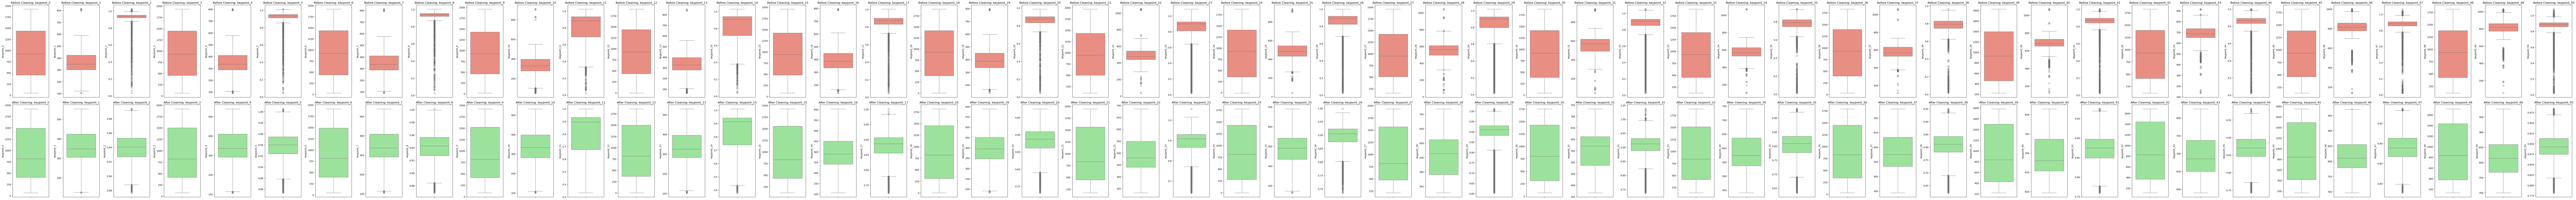

In [16]:
# data visualization before and after removing outliers
fig, axes = plt.subplots(2, len(keypoint_cols), figsize=(3*len(keypoint_cols), 12))

# If only one column, axes is not a 2D array, so we reshape
if len(keypoint_cols) == 1:
    axes = np.array([[axes[0]], [axes[1]]])

for i, col in enumerate(keypoint_cols):
    sns.boxplot(ax=axes[0, i], y=df[col], color="salmon")
    axes[0, i].set_title(f"Before Cleaning: {col}")
    sns.boxplot(ax=axes[1, i], y=df_clean[col], color="lightgreen")
    axes[1, i].set_title(f"After Cleaning: {col}")

plt.tight_layout()
plt.show()

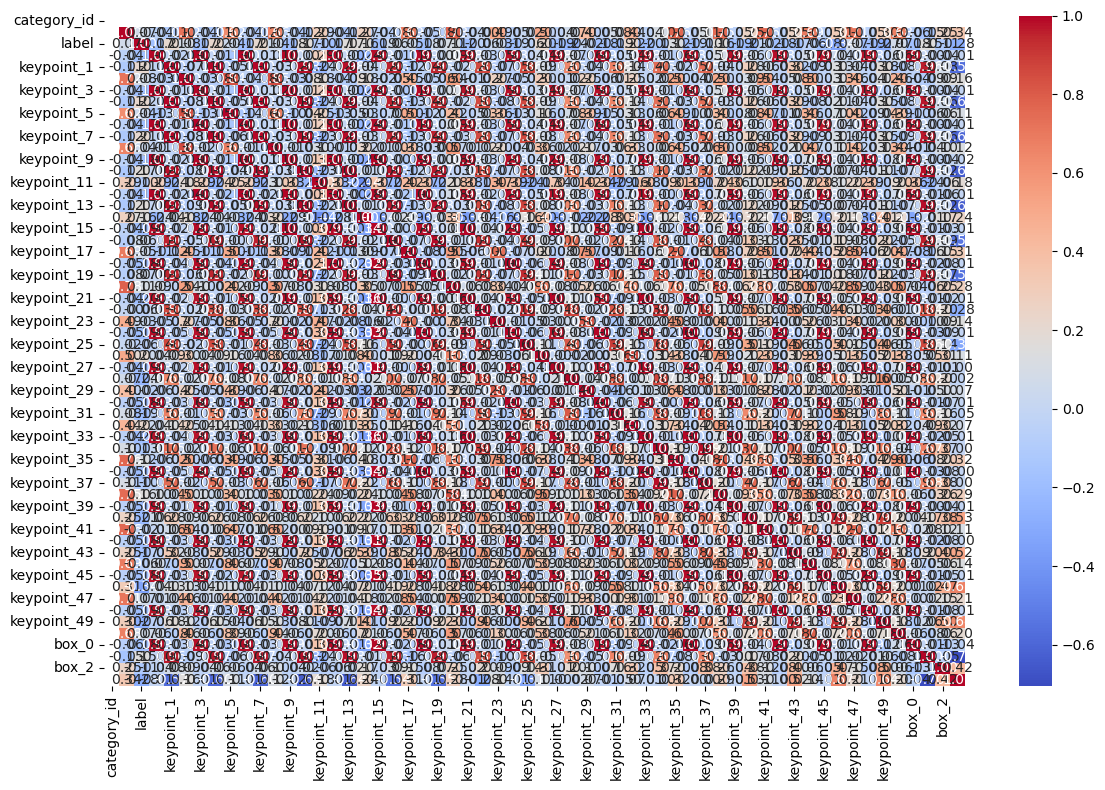

In [17]:
#print a heatmap to see the correlation between attributes

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

plt.tight_layout()
plt.show()

In [18]:
print(df_clean.columns)

Index(['file_id', 'image_id', 'category_id', 'score', 'label', 'keypoint_0',
       'keypoint_1', 'keypoint_2', 'keypoint_3', 'keypoint_4', 'keypoint_5',
       'keypoint_6', 'keypoint_7', 'keypoint_8', 'keypoint_9', 'keypoint_10',
       'keypoint_11', 'keypoint_12', 'keypoint_13', 'keypoint_14',
       'keypoint_15', 'keypoint_16', 'keypoint_17', 'keypoint_18',
       'keypoint_19', 'keypoint_20', 'keypoint_21', 'keypoint_22',
       'keypoint_23', 'keypoint_24', 'keypoint_25', 'keypoint_26',
       'keypoint_27', 'keypoint_28', 'keypoint_29', 'keypoint_30',
       'keypoint_31', 'keypoint_32', 'keypoint_33', 'keypoint_34',
       'keypoint_35', 'keypoint_36', 'keypoint_37', 'keypoint_38',
       'keypoint_39', 'keypoint_40', 'keypoint_41', 'keypoint_42',
       'keypoint_43', 'keypoint_44', 'keypoint_45', 'keypoint_46',
       'keypoint_47', 'keypoint_48', 'keypoint_49', 'keypoint_50', 'box_0',
       'box_1', 'box_2', 'box_3'],
      dtype='object')


In [19]:
# padded sequence to ensure all in the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

feature_cols = [col for col in df_clean.columns if col not in ['file_id', 'image_id', 'label']]  # Exclude non-features

sequences = []
file_ids = []
for file_id, group in df_clean.groupby('file_id'):
    seq = group[feature_cols].values
    sequences.append(seq)
    file_ids.append(file_id)

padded_sequences = pad_sequences(sequences, padding='post', dtype='float32')  # shape: (num_files, max_seq_len, num_features)
print(padded_sequences)

[[[1.0000000e+00 3.0523825e+00 3.0863678e+02 ... 4.3797568e+02
   2.4570236e+02 3.4870139e+02]
  [1.0000000e+00 3.0523825e+00 3.0863678e+02 ... 4.3797568e+02
   2.4570236e+02 3.4870139e+02]
  [1.0000000e+00 3.0528011e+00 3.0870312e+02 ... 4.3799707e+02
   2.4567345e+02 3.4902502e+02]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[1.0000000e+00 3.0285845e+00 2.5660376e+02 ... 4.5664868e+02
   3.1534351e+02 4.5328247e+02]
  [1.0000000e+00 3.0098472e+00 2.5621506e+02 ... 4.5599402e+02
   3.1584042e+02 4.5488470e+02]
  [1.0000000e+00 3.0107861e+00 2.5636566e+02 ... 4.5571078e+02
   3.1570734e+02 4.5666690e+02]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.000

In [20]:
# label assignment
labels = df_clean.groupby('file_id')['label'].first().loc[file_ids].values

Step 4: Data Splitting (Train-test Split)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13, 1812, 57)
X_test shape: (4, 1812, 57)
y_train shape: (13,)
y_test shape: (4,)


In [23]:
# 1. Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# 2. Scale targets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

print("y_train_scaled shape:", y_train_scaled.shape)
print("y_test_scaled shape:", y_test_scaled.shape)

X_train_scaled shape: (13, 1812, 57)
X_test_scaled shape: (4, 1812, 57)
y_train_scaled shape: (13, 1)
y_test_scaled shape: (4, 1)


Step 3: Build and Train LSTM Model

In [25]:
from tensorflow.keras import layers, models

timesteps = X_train.shape[1]
num_features = X_train.shape[2]

lstm = models.Sequential([
    layers.Masking(mask_value=0., input_shape=(timesteps, num_features)),  # Handles padding
    layers.LSTM(64, return_sequences=False),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' and more units for multi-class
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.summary()

lstm.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 1812, 57)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,297 (122.25 KB)

 Trainable params: 31,297 (122.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 0.4946 - val_accuracy: 0.0000e+00 - val_loss: 0.8898
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step - accuracy: 0.0000e+00 - loss: 0.2038 - val_accuracy: 0.0000e+00 - val_loss: 1.0444
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - accuracy: 0.0000e+00 - loss: -0.0538 - val_accuracy: 0.0000e+00 - val_loss: 1.2157
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step - accuracy: 0.0000e+00 - loss: -0.2783 - val_accuracy: 0.0000e+00 - val_loss: 1.3999
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step - accuracy: 0.0000e+00 - loss: -0.4727 - val_accuracy: 0.0000e+00 - val_loss: 1.5923
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step - accuracy: 0.0000e+00 - loss: -0.6447 - val_accuracy: 0.0000e+00 - val_loss: 1.7887
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step - accuracy: 0.0000e+00 - loss: -0.7963 - val_accuracy: 0.0000e+00 - val_loss: 1.9862
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step - accuracy

Step 4: Evaluation | Test Metrics

In [27]:
loss, acc = lstm.evaluate(X_train, y_train_scaled)
print(f"Train accuracy: {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.0000e+00 - loss: 1.5627
Train accuracy: 0.0


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_eval(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R^2: {r2:.4f}")

In [29]:
# Make predictions (these will be in scaled space)
y_pred_lstm_scaled = lstm.predict(X_train)

# Inverse transform predictions to original scale
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Evaluate (use original y)
model_eval(y_train, y_pred_lstm.flatten(), "LSTM Regressor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
LSTM Regressor Evaluation:
  MSE: 0.3417
  MAE: 0.5632
  R^2: -0.6039
